In [1]:
import torch
import XAI_core
import datasets
import models
from matplotlib import pyplot as plt

device = torch.device("cuda:0" if torch.cuda.is_available() != -1 else "cpu")


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
model = models.get_model("vgg16", cuda = device == torch.device("cuda:0"), classes = datasets.REPTILES)
dataset = datasets.ImageNetSubset(root = "C:\\ImageNet", classes = datasets.REPTILES)
loader = datasets.get_data_loader(dataset, batch_size = 3, shuffle = False)
explainer = XAI_core.ConceptExplainer(model, *dataset.mean_std())


In [4]:
layer = model._modules["features"][28]
print(model._modules["classifier"][6].bias)
layer

Parameter containing:
tensor([   -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf, -0.0117, -0.0107, -0.0295, -0.0072,  0.0392,  0.0116,  0.0028,
        -0.0054, -0.0040,  0.0001, -0.0116, -0.0019,  0.0158, -0.0177,  0.0106,
         0.0125,  0.0068, -0.0129, -0.0044,  0.0035, -0.0027,  0.0223,  0.0232,
         0.0101,  0.0126,  0.0079,  0.0211, -0.0168,  0.0063, -0.0283,  0.0075,
        -0.0294,  0.0490,  0.0497,  0.0382, -0.0621,  0.0176,  0.0137,  0.0551,
         0.0636, -0.0159, -0.0215,  0.0242,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,    -inf,
           -inf,  

Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [5]:
it = iter(loader)
x, y, _ = next(it)
x.shape

torch.Size([3, 3, 224, 224])

tensor([27])


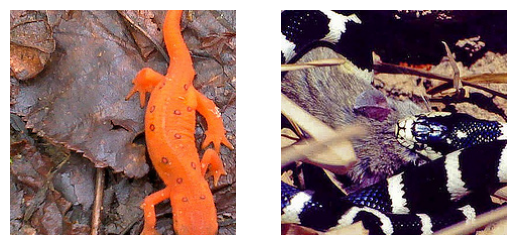

In [29]:
x,y,_ = dataset[12]

y = torch.tensor([y]).long()
x_hat, y_hat, _ = dataset[22]
print(y)

x = x[None,:]
x_viz = dataset.prep_for_viz(x)
x_hat = x_hat[None, :]
x_hat_viz = dataset.prep_for_viz(x_hat)


fig, axs = plt.subplots(1,2)

for ax in axs: ax.axis("off")
axs[0].imshow(x_viz[0])
axs[1].imshow(x_hat_viz[0])

In [30]:
from zennit.image import imgify, imsave

gamma = 1000



prediction = tensor([27], device='cuda:0')
tensor(1.0000)


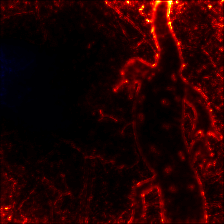

In [31]:
composite_args = dict(epsilon = 1e-6, gamma = gamma)
explainer = XAI_core.ConceptExplainer(model, *dataset.mean_std(), composite_args = composite_args)

out, grad, interm_info = explainer.explain(x.to(device), target_logits = y.long(), layer = layer)

# out, grad, interm_info = explainer.explain(x.to(device), target_logits = torch.tensor([y]).long(), layer = layer)
print(f"prediction = {out.argmax(axis = 1)}")
grad = grad.sum(axis = 1).cpu()
print(grad.sum())
imgify(grad[0], symmetric = True, cmap='coldnhot')

torch.Size([1, 512])
torch.return_types.topk(
values=tensor([[0.1471, 0.1100, 0.1016, 0.0928, 0.0862, 0.0808, 0.0777, 0.0770, 0.0694,
         0.0692]], device='cuda:0'),
indices=tensor([[282,  41, 432, 368,  93, 315, 479, 105,  12, 183]], device='cuda:0'))
tensor(0.0694, device='cuda:0')


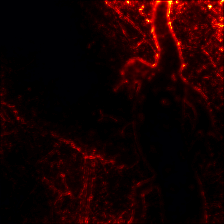

In [38]:
grad_layer = interm_info["intermediate_rel"]

print(grad_layer.shape)
print(grad_layer.topk(10))

grad = explainer.explain_channel(interm_info, 12, retain_graph = True)
print(grad[0].sum())

grad = grad.sum(axis = 1).cpu()
imgify(grad[0], symmetric = True, cmap='coldnhot')

In [ ]:
"25": ["n01629819", "European_fire_salamander"], "26": ["n01630670", "common_newt"], "27": ["n01631663", "eft"], "28": ["n01632458", "spotted_salamander"], "29": ["n01632777", "axolotl"], "30": ["n01641577", "bullfrog"], "31": ["n01644373", "tree_frog"], "32": ["n01644900", "tailed_frog"], "33": ["n01664065", "loggerhead"], "34": ["n01665541", "leatherback_turtle"], "35": ["n01667114", "mud_turtle"], "36": ["n01667778", "terrapin"], "37": ["n01669191", "box_turtle"], "38": ["n01675722", "banded_gecko"], "39": ["n01677366", "common_iguana"], "40": ["n01682714", "American_chameleon"], "41": ["n01685808", "whiptail"], "42": ["n01687978", "agama"], "43": ["n01688243", "frilled_lizard"], "44": ["n01689811", "alligator_lizard"], "45": ["n01692333", "Gila_monster"], "46": ["n01693334", "green_lizard"], "47": ["n01694178", "African_chameleon"], "48": ["n01695060", "Komodo_dragon"], "49": ["n01697457", "African_crocodile"], "50": ["n01698640", "American_alligator"], "51": ["n01704323", "triceratops"], "52": ["n01728572", "thunder_snake"], "53": ["n01728920", "ringneck_snake"], "54": ["n01729322", "hognose_snake"], "55": ["n01729977", "green_snake"], "56": ["n01734418", "king_snake"], "57": ["n01735189", "garter_snake"], "58": ["n01737021", "water_snake"], "59": ["n01739381", "vine_snake"], "60": ["n01740131", "night_snake"], "61": ["n01742172", "boa_constrictor"], "62": ["n01744401", "rock_python"], "63": ["n01748264", "Indian_cobra"], "64": ["n01749939", "green_mamba"], "65": ["n01751748", "sea_snake"], "66": ["n01753488", "horned_viper"], "67": ["n01755581",